In [23]:
neg_words = set()
with open('./vader_lexicon.txt',encoding='utf-8') as f:
    for line in f.readlines():
        item = line.strip().split('\t')
        word = item[0]
        score = item[1]
        if float(score) < 0:
            neg_words.add(word)
print(len(neg_words))

4170


In [ ]:
import pandas as pd
import jieba

df = pd.read_csv('./twitter_text_score_5_13.csv', header=0)
word_corpus = df['content'].values
word_corpus

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse
import numpy as np
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(word_corpus)
word = vectorizer.get_feature_names()
count = np.sum(X.toarray(), axis=0)
# print(len(count))
combine_dict = dict()
combile = zip(word, count)

combine_dict = {word:count for word,count in combile if word in neg_words}
print(combine_dict)

{'affected': 1, 'aggressive': 1, 'anti': 2, 'argument': 1, 'attack': 2, 'avoid': 1, 'awaited': 1, 'bad': 5, 'badly': 3, 'bankrupt': 1, 'battle': 4, 'beating': 1, 'bitter': 1, 'blames': 1, 'blocking': 1, 'blocks': 1, 'bribe': 1, 'brutal': 2, 'bullied': 1, 'burden': 3, 'chaos': 2, 'cheat': 1, 'clueless': 1, 'conflict': 2, 'confrontation': 1, 'confused': 2, 'contradicting': 2, 'costly': 2, 'crash': 1, 'crazy': 1, 'crisis': 1, 'criticized': 1, 'cuts': 2, 'cutting': 1, 'cynically': 1, 'damage': 5, 'damages': 1, 'damaging': 3, 'dangerous': 2, 'debt': 1, 'defeating': 1, 'defiant': 1, 'deficit': 2, 'delayed': 2, 'demand': 1, 'destroy': 1, 'destroyed': 1, 'devastated': 1, 'devastating': 3, 'difficult': 1, 'dilemma': 1, 'disaster': 2, 'disastrous': 2, 'disgusting': 2, 'dishonest': 1, 'disputes': 3, 'disruption': 2, 'douche': 1, 'drags': 1, 'drop': 5, 'dumb': 1, 'dumps': 1, 'emergency': 1, 'enemy': 1, 'failed': 3, 'fails': 1, 'fake': 1, 'fallen': 6, 'falling': 2, 'fatal': 1, 'fear': 1, 'fears': 2

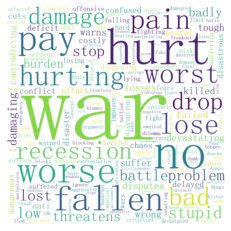

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
font = r'C:\Windows\Fonts\simfang.ttf'
wc = WordCloud(background_color="white", max_words=10000,font_path=font,width=1400, height=1400)
wc.generate_from_frequencies(combine_dict)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()